In [13]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
from plotly.graph_objs import Histogram as H
import plotly.graph_objs as go
import pandas as pd
import numpy as np
init_notebook_mode(connected=True)

In [3]:
#Load games
meta_games = pd.read_csv('../Data/result.csv')

#to_drop = ["name", "console","userscore"]
#metascore_date_df = meta_games.copy()
#metascore_date_df.drop(to_drop, inplace=True, axis=1)

# make new year column and replace tbd values with np.nans
meta_games['year'] = np.nan
meta_games.replace('tbd', np.nan)

# enter year value from date column
for i, row in meta_games.iterrows():
    year_value = meta_games['date'][i].split(',')[1].strip()
    meta_games.at[i,'year'] = int(year_value)

meta_games = meta_games.replace('tbd', np.nan)
meta_games_years = {}

# make a dict of meta_game dataframes for each year from 2000 to 2019
for i in range(2000,2019):
    meta_games_years[i] = meta_games[(meta_games['year'] == i)]

#meta_game_years is the proper df
meta_games_years[2000].sample(5)


,metascore,name,console,userscore,date,year
3211,80,RollerCoaster Tycoon: Loopy Landscapes,PC,8.9,"Sep 30, 2000",2000.0
5218,70,F1 Championship Season 2000,PC,7.5,"Dec 6, 2000",2000.0
1487,83,Metal Gear Solid,PC,8.9,"Sep 24, 2000",2000.0
1437,88,Excitebike 64,N64,8,"Apr 30, 2000",2000.0
6838,44,NFL QB Club 2001,DC,NaN,"Jul 30, 2000",2000.0


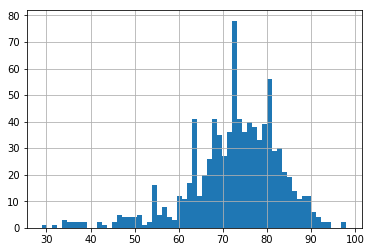

In [4]:
#Histogram with number of bins set to number of unique metascores
df = meta_games_years[2018]['metascore']
list1 = np.unique(meta_games_years[2018]['metascore']).shape
bins = list1[0]
hist = df.hist(bins=bins)

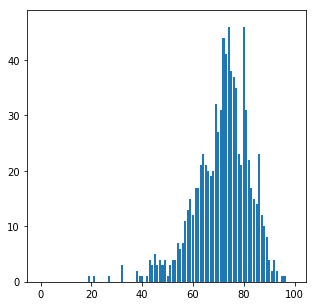

In [5]:
#Barchart for metascores for given year
#Needs slider to switch between years - perhaps info about mean or median

#make a list of all metascores from given year, and array into list
metascore_year = np.flip((meta_games_years[2015]['metascore']))
metascore_year = list(metascore_year)


# go thorugh every number from 0 to 100, for each number, count how reviews there are with that value
# append number to list, such that each number on list represents how many reviews there are at that index.
metascore_freq=[]
for i in range(100):
    metascore_freq.append(metascore_year.count(i))
    
# set range for x axis to be range from 0 to 100
x_range = list(range(100))
index2 = np.arange(len(x_range))
plt.ylim(top=49)
plt.bar(index2, metascore_freq)
fig = plt.gcf()
fig.set_size_inches(5,5, forward = False)
plt.show()

<BarContainer object of 100 artists>

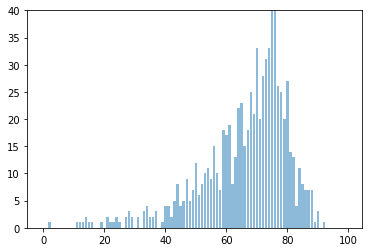

In [6]:
#Barchart for USERSCORES for given year
#Needs slider to switch between years - perhaps info about mean or median

# make a list of userscores, cast as ints instead of string and remove nans
userscore_year = (meta_games_years[2018]['userscore'])
y = userscore_year.astype(np.float)
y = np.sort(y*10)
userscore_list=[]
for i in y:
    if not np.isnan(i):
        userscore_list.append(int(i))
y
userscore_list
userscore_freq=[]
for i in range(100):
    userscore_freq.append(userscore_list.count(i))

# set range for x axis to be range from 0 to 100
x_range = list(range(100))
index2 = np.arange(len(x_range))
plt.ylim(top=40)
plt.bar(index2, userscore_freq, alpha=0.5)


#plt.savefig('2018.png')
#plt.show()



In [7]:
#metascore mean and median
metascore_year = np.flip((meta_games_years[2001]['metascore']))
metascore_year = list(metascore_year)
#mean and median for year
sum(metascore_year) / float(len(metascore_year))
statistics.median(metascore_year)

73

In [8]:
#userscore mean and median
userscore_year = (meta_games_years[2017]['userscore'])
y = userscore_year.astype(np.float)
y = np.sort(y*10)
userscore_list=[]
for i in y:
    if not np.isnan(i):
        userscore_list.append(int(i))

sum(userscore_list) / float(len(userscore_list))
statistics.median(userscore_list)

70

In [14]:
#Plotting meta_games data as histogram, both user-and metascores per year, with a slider.
years = list(range(2000, 2019))
   
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill in most of layout
figure['layout']['xaxis'] = {'range': [0, 100], 'title': 'Scores'}
figure['layout']['yaxis'] = {'range': [0, 220],'title': 'Count'}
figure['layout']['bargap'] = 0.3
figure['layout']['hovermode'] = 'closest'
figure['layout']['sliders'] = {
    'args': [
        'transition', {
            'duration': 400,
            'easing': 'cubic-in-out'
        }
    ],
    'initialValue': '2000',
    'plotlycommand': 'animate',
    'values': years,
    'visible': True
}
figure['layout']['updatemenus'] = [
    {
        #REMOVED BUTTONS HERE
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make data
year = 2000
userscore_raw2000 = (meta_games_years[2000]['userscore'])
userscore_list2000 = np.sort(userscore_raw2000.astype(np.float)*10)
meta_games_by_year= meta_games[meta_games['year'] == year]

#2 datadicts which are put into figure['data'], like trace 1 and 2
data_dict_2000meta = H({
    'x': list(meta_games_by_year['metascore']), #changed _and_cont
    #'histnorm': 'percent',
    #'y': list(dataset_by_year['gdpPercap']), #changed _and_cont
    "histfunc" : "count",
    'name': "metascore",
    'xbins' : dict(
            start=0,
            end=100,
            size=5
    ),
    'marker' : dict(
        color='#8181F7'
    )
})
figure['data'].append(data_dict_2000meta)

data_dict_2000user = H({
    'x': userscore_list2000,
    #'histnorm': 'percent',
    'histfunc': 'count',
    'name': "userscore",
    'xbins': dict(
        start=0,
        end=100,
        size=5
    ),
    'marker': dict(
        color='#EB89B5'
    )
})

figure['data'].append(data_dict_2000user)

#make frames for histogram slider
for year in years:
    frame = {'data': [], 'name': str(year)}
    meta_games_by_year= meta_games[meta_games['year'] == year]
    
    data_dict1 = H({
            'x': list(meta_games_by_year['metascore']),
            #'histnorm': 'percent',
            'histfunc': 'count',
            'name': "metascore",
            'xbins': dict(
                start=0,
                end=100,
                size=5
            ),
            'marker':dict(
                color='#8181F7'
    )
    })
    
    userscore_raw = (meta_games_years[year]['userscore'])
    userscore_list = np.sort(userscore_raw.astype(np.float)*10)
    
    data_dict2 = H({
            'x': userscore_list,
            #'histnorm': 'percent',
            'histfunc': 'count',
            'name': "userscore",
            'xbins': dict(
                start=0,
                end=100,
                size=5
            ),
            'marker': dict(
                color='#EB89B5'
    )
    })
    frame['data'].append(data_dict1)
    frame['data'].append(data_dict2)
    
    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': True},
         'mode': 'immediate',
       'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)
    
figure['layout']['sliders'] = [sliders_dict]

iplot(figure)

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np

py.init_notebook_mode()

#get userscore_list
userscore_raw = (meta_games_years[2002]['userscore'])
userscore_list = np.sort(userscore_raw.astype(np.float)*10)

#metascore
metascore_list = list(np.flip((meta_games_years[2002]['metascore'])))

metascore_list # list of metascores


x0 = metascore_list
x1 = userscore_list

trace1 = go.Histogram(
    x=x0,
    histnorm='percent',
    name='metascore',
    xbins=dict(
        start=0,
        end=100,
        size=3
    ),
    marker=dict(
        color='#FFD7E9',
    ),
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1,
    name='userscore',
    xbins=dict(
        start=0,
        end=100,
        size=3
    ),
    marker=dict(
        color='#EB89B5'
    ),
    opacity=0.75
)
data = [trace1, trace2]

layout = go.Layout(
    title='Scores',
    xaxis=dict(
        title='Score',
        range=[0, 100]
    ),
    yaxis=dict(
        title='Count',
        range=[0, 125]
    ),
    barmode='stack',
    bargap=0,
    bargroupgap=0
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='styled histogram')

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np

py.init_notebook_mode()


for i in range (2000, 2019):
#get userscore_list
    userscore_raw = (meta_games_years[i]['userscore'])
    userscore_list = np.sort(userscore_raw.astype(np.float)*10)

#metascore
    metascore_list = list(np.flip((meta_games_years[i]['metascore'])))
    if i == 2001:
        print(len(metascore_list))
        print(len(userscore_list))

    metascore_list # list of metascore

    x0 = metascore_list
    x1 = userscore_list

    trace1 = go.Histogram(
        x=x0,
        name='metascore',
        xbins=dict(
            start=0,
            end=100,
            size=5
        ),
        marker=dict(
            color='#8181F7',
        ),
        opacity=0.5
    )
    trace2 = go.Histogram(
        x=x1,
        name='userscore',
        xbins=dict(
            start=0,
            end=100,
            size=5
        ),
        marker=dict(
            color='#EB89B5'
        ),
        opacity=0.5
    )
    data = [trace1, trace2]

    layout = go.Layout(
        title='Scores '+str(i),
        xaxis=dict(
            title='Score',
            range=[0, 100]
        ),
        yaxis=dict(
            title='Count',
            range=[0, 200]
        ),
        #UNCOMMENT FOR OVERLAY BARS
        barmode='overlay', 
        bargap=0,
        bargroupgap=0
    
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='styled histogram')
    print(i)

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np

py.init_notebook_mode()


for i in range (2000, 2019):
#get userscore_list
    userscore_raw = (meta_games_years[i]['userscore'])
    userscore_list = np.sort(userscore_raw.astype(np.float)*10)

#metascore
    metascore_list = list(np.flip((meta_games_years[i]['metascore'])))
    if i == 2001:
        print(len(metascore_list))
        print(len(userscore_list))

    metascore_list # list of metascore

    x0 = metascore_list
    x1 = userscore_list

    trace1 = go.Histogram(
        x=x0,
        histnorm='percent',
        name='metascore',
        xbins=dict(
            start=0,
            end=100,
            size=5
        ),
        marker=dict(
            color='#8181F7', ##FFD7E9
        ),
        opacity=0.5
    )
    trace2 = go.Histogram(
        x=x1,
        histnorm='percent',
        name='userscore',
        xbins=dict(
            start=0,
            end=100,
            size=5
        ),
        marker=dict(
            color='#EB89B5'
        ),
        opacity=0.5
    )
    data = [trace1, trace2]

    layout = go.Layout(
        title='Scores '+str(i),
        xaxis=dict(
            title='Score '+str(i),
            range=[0, 100]
        ),
        yaxis=dict(
            title='Count',
            range=[0, 30]
        ),
        #UNCOMMENT FOR NON-OVERLAY
        #barmode='overlay', 
        bargap=0.1,
        bargroupgap=0
    
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='styled histogram')
    print(i)


In [ ]:

for i in range (2000, 2019):
#get userscore_list
    userscore_raw = (meta_games_years[i]['userscore'])
    userscore_list = np.sort(userscore_raw.astype(np.float)*10)
    
print(userscore_list)

In [ ]:
 metascore_test1 = list(((meta_games_years[2000]['metascore'])))
metascore_test1
meta_games_years[2018]['metascore']
metascore_list_test = list(((meta_games_years[2002]['metascore'])))
(metascore_list_test)